# Comparing 2 Stacks of Catalogues

## Environment: anaconda-2.7 

In [1]:
import sys
print sys.executable
# Hack!, this avoids messing with NERSC's config file for jupyter hub
sys.path.append('/global/homes/k/kaylanb/repos/astrometry.net')
sys.path.append('/global/homes/k/kaylanb/repos/tractor')
sys.path
print sys.path

/anaconda2/bin/python
['', '/anaconda2/lib/python27.zip', '/anaconda2/lib/python2.7', '/anaconda2/lib/python2.7/plat-linux2', '/anaconda2/lib/python2.7/lib-tk', '/anaconda2/lib/python2.7/lib-old', '/anaconda2/lib/python2.7/lib-dynload', '/global/homes/k/kaylanb/.local/lib/python2.7/site-packages', '/anaconda2/lib/python2.7/site-packages', '/anaconda2/lib/python2.7/site-packages/Sphinx-1.4.1-py2.7.egg', '/anaconda2/lib/python2.7/site-packages/setuptools-23.0.0-py2.7.egg', '/anaconda2/lib/python2.7/site-packages/IPython/extensions', '/global/u2/k/kaylanb/.ipython', '/global/homes/k/kaylanb/repos/astrometry.net', '/global/homes/k/kaylanb/repos/tractor']


## Need more packages?

In [5]:
# Easy if pip, conda installable
#!/anaconda2/bin/pip install ...
#!/anaconda2/bin/conda install ...

# Main()

Run [legacy-zeropoints-qa.py](https://github.com/legacysurvey/legacypipe/blob/57fd01b80ed6af65543a1177798977da45975f3a/py/legacyccds/legacy-zeropoints.py) like this `"python legacy-zeropoints-qa.py"` to analyze everything. 

See below to walk through it step by step.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import fitsio
import glob
import os
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from astropy import units
from astropy.coordinates import SkyCoord

from astrometry.util.fits import fits_table, merge_tables
from tractor.brightness import NanoMaggies


In [3]:
import catalogues as cat

# MZLS v2, v3 tractor cats

In [28]:
cut= np.all((np.all(v2.get('decam_nobs')[:,[4]] == 1,axis=1),\
             ),axis=0)
v2.get('decam_nobs')[:,4][cut]

1

In [24]:
np.where(v2.get('decam_nobs')[:,4] == 1)

(array([     9,     13,     14, ..., 165676, 165677, 165682]),)

In [ ]:
fits_funcs= cat.CatalogueFuncs()
v2=fits_funcs.stack('v2_cats.txt')
v3=fits_funcs.stack('v3_cats.txt')

In [29]:
cut= np.all((np.all(v2.get('decam_nobs')[:,[4]] == 1,axis=1),\
             ),axis=0)
v2.cut(cut)
cut= np.all((np.all(v3.get('decam_nobs')[:,[4]] == 1,axis=1),\
             ),axis=0)
v3.cut(cut)

mat=cat.Matcher()
imatch,imiss,d2d= mat.match_within(v2,v3) #,dist=1./3600)
fits_funcs.set_mags(v2)
fits_funcs.set_mags(v3)

Matched: 86162/88034 objects


In [9]:
import plots

In [30]:
k=plots.Kaylans(v2,v3,imatch,\
                ref_name='v2',obs_name='v3',savefig=True)

In [31]:
d=plots.Dustins(v2,v3,imatch,d2d,\
             ref_name='v2',obs_name='v3',savefig=True)

('Median mw_trans', 'g', 'is', 0.64602697)
('Median mw_trans', 'r', 'is', 0.74504399)
('Median mw_trans', 'z', 'is', 0.84821224)
('Raw mean and std of points:', nan, nan)
('sig= ', array([], dtype=float32), 'len(sig)=', 0)
('Median and percentile-based sigma:', nan, -1)
('Raw mean and std of points:', nan, nan)
('sig= ', array([], dtype=float32), 'len(sig)=', 0)
('Median and percentile-based sigma:', nan, -1)
('Raw mean and std of points:', 0.028856862, 0.29600513)
('sig= ', array([ 0.00747771,  0.05404525, -0.18384862, ...,  0.44771522,
        0.30427396,  0.26952279], dtype=float32), 'len(sig)=', 33502)
('Median and percentile-based sigma:', 0.018961083, 0.1335631977021694)
('y=', array([ nan,  nan,  nan, ...,  nan,  nan,  nan], dtype=float32))
('I=', array([], dtype=int64))
('ybin =', array([], dtype=float32))
('Mag bin', 21.0, 24.0, 'band', 'g', ': IQD is factor', -0.74130110925280102, 'vs expected for Gaussian;', 0, 'points')
('y=', array([ nan,  nan,  nan, ...,  nan,  nan,  nan]

In [375]:
import plots
d=plots.Dustins(v2,v3,imatch,d2d,plot_all=False)


In [397]:

mat.match_within(self,ref,obs,dist=1./3600)

[1, 2, 3, 4]

In [456]:
# Take v2 and shift everything by 1/3 pix in dec
fits_funcs= cat.CatalogueFuncs()
v4=fits_funcs.stack('v2_cats.txt')

In [457]:
third_pix= (1./3)*0.262/3600
v4.set('dec',v4.get('dec')+third_pix)
fits_funcs.set_extra_data(v4)
mat=cat.Matcher()
imatch,imiss,d2d= mat.match_within(v2,v4) #,dist=1./3600)

Matched: 165699/165699 objects


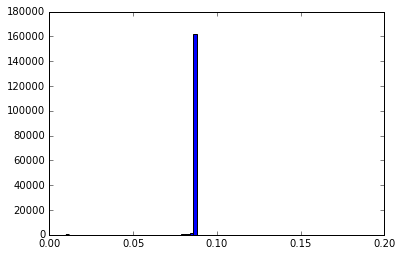

In [460]:
a=plt.hist(d2d * 3600., 100,range=(0.01,0.2))

In [396]:
import plots
k=plots.Kaylans(v2,v3,imatch,plot_all=False)
for mytype in ['PSF','SIMP','DEV','COMP']:
    k.stacked_confusion_matrix(v2[ imatch['ref'] ],v3[ imatch['obs'] ],\
                               ref_name='v2',obs_name='v3',savefig=True,\
                               band='z',mytype=mytype)

In [486]:
import plots
k=plots.Kaylans(v2,v3,imatch,plot_all=False)
# k.barchart(v2,v3,\
#            ref_name='v2',obs_name='v3',savefig=True,prefix='alldata')
# k.barchart(v2[ imatch['ref']],v3[imatch['obs']],\
#            ref_name='v2',obs_name='v3',savefig=True,prefix='matchedonly')
k.delta_mag_vs_mag(v2[ imatch['ref']],v3[imatch['obs']],\
            ref_name='v2',obs_name='v3',savefig=True,ylim=[-0.2,0.2])

In [480]:
import plots
d=plots.Dustins(v2,v3,imatch,d2d,plot_all=False)
d.match_distance(d2d,range=(0,0.2),prefix='',savefig=True)
# imatch_2,imiss_2,d2d_2= mat.match_within(v3,v2)
# d.match_/distance(d2d_2,range=(0,0.2),savefig=True,prefix='2_')

In [442]:
import catalogues
mat=catalogues.Matcher()
d={}
for key in ['v2_auto','v3_auto','v2v3_cross']:
    d[key]={}
    if key == 'v2v3_cross':
        tup= mat.nearest_neighbors_within(v2,v3,within=1./3600,min_nn=1,max_nn=3)
    elif key == 'v2_auto': 
        tup= mat.nearest_neighbors_within(v2,v2,within=1./3600,min_nn=2,max_nn=4)
    elif key == 'v3_auto': 
        tup= mat.nearest_neighbors_within(v3,v3,within=1./3600,min_nn=2,max_nn=4)
    d[key]['ref'],d[key]['obs'],d[key]['dist']= tup

within 1arcsec, nn=2, 21119/165699
within 1arcsec, nn=3, 1155/165699
within 1arcsec, nn=4, 4/165699
within 1arcsec, nn=2, 20958/163769
within 1arcsec, nn=3, 1120/163769
within 1arcsec, nn=4, 0/163769
within 1arcsec, nn=1, 161755/165699
within 1arcsec, nn=2, 20778/165699
within 1arcsec, nn=3, 1113/165699


In [443]:
d[key]['dist']

{'1': array([  2.02415355e-06,   5.88182857e-07,   8.29685969e-07, ...,
          5.03871223e-06,   3.26318253e-06,   5.21471035e-05]),
 '2': array([  6.24419260e-06,   1.95633020e-06,   7.03720806e-07, ...,
          1.30326732e-05,   8.14032630e-06,   9.12097698e-06]),
 '3': array([  1.13596996e-06,   8.55659268e-06,   4.83908940e-06, ...,
          3.07454543e-06,   2.22440656e-06,   1.56397319e-05])}

In [444]:
key='v2v3_cross'
dists={}
for cnt,nn in enumerate(np.sort(d[key]['ref'].keys())):
    if cnt == 0:
        dists[nn]= d[key]['dist'][nn]
    else:
        dists[nn]= np.concatenate((d[key]['dist'][nn], dists[str(int(nn)-1)]))
    print('nn=%s, len(dists[nn])=%d' % (nn,len(dists[nn])))
#     if str(int(nn)-1) in d[key]['ref'].keys():
#     distsplt.hist(d[key]['dist'][nn]*3600,20,range=(0.01,0.1),normed=True)

nn=1, len(dists[nn])=161755
nn=2, len(dists[nn])=182533
nn=3, len(dists[nn])=183646


In [449]:
print dists['1']
np.histogram(dists['1']*3600,bins=bins,normed=True)

[  2.02415355e-06   5.88182857e-07   8.29685969e-07 ...,   5.03871223e-06
   3.26318253e-06   5.21471035e-05]


(array([ 63.81948522,  42.94800705,  29.73376534,  20.2379658 ,
         14.23796097,  11.0887618 ,   8.31370218,   6.08493222,
          4.00076833,   2.41010141,   1.80872372,   1.39785882,
          1.20964137,   0.94338255,   0.82172981,   0.63351237,
          0.55088032,   0.46136227,   0.40856957]),
 array([ 0.01      ,  0.01473684,  0.01947368,  0.02421053,  0.02894737,
         0.03368421,  0.03842105,  0.04315789,  0.04789474,  0.05263158,
         0.05736842,  0.06210526,  0.06684211,  0.07157895,  0.07631579,
         0.08105263,  0.08578947,  0.09052632,  0.09526316,  0.1       ]))

[ 0.01        0.01473684  0.01947368  0.02421053  0.02894737  0.03368421
  0.03842105  0.04315789  0.04789474  0.05263158  0.05736842  0.06210526
  0.06684211  0.07157895  0.07631579  0.08105263  0.08578947  0.09052632
  0.09526316  0.1       ]
3
[ 0.01236842  0.01710526  0.02184211  0.02657895  0.03131579  0.03605263
  0.04078947  0.04552632  0.05026316  0.055       0.05973684  0.06447368
  0.06921053  0.07394737  0.07868421  0.08342105  0.08815789  0.09289474
  0.09763158] [ 62.63252882  42.8880365   29.57574992  20.10839082  14.38198818
  11.10090343   8.47563574   6.38621858   4.1068544    2.56728386
   1.90146959   1.52557445   1.28564137   1.03771053   0.88975181
   0.709802     0.59383435   0.4918628    0.45187395]
2
[ 0.01236842  0.01710526  0.02184211  0.02657895  0.03131579  0.03605263
  0.04078947  0.04552632  0.05026316  0.055       0.05973684  0.06447368
  0.06921053  0.07394737  0.07868421  0.08342105  0.08815789  0.09289474
  0.09763158] [ 62.67751122  42.89012209  29.62

(0.0, 70.0)

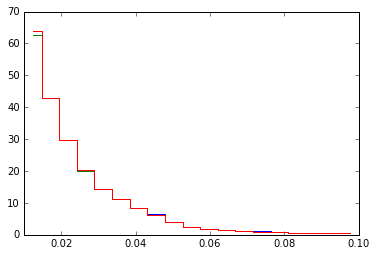

In [455]:
key='v2v3_cross'
bins=np.linspace(0.01,0.1,num=20)
print bins
for nn in np.sort(d[key]['ref'].keys())[::-1]:
    print nn
    hist,bj= np.histogram(dists[nn]*3600,bins=bins,normed=True)
    binc= (bins[1:]+bins[:-1])/2
    plt.step(binc,hist, where='mid')
    print binc,hist
plt.xlim((bins[0],bins[-1]))
plt.ylim()
#     plt.hist(dists[nn]*3600,20,range=(0.01,0.1),normed=True)

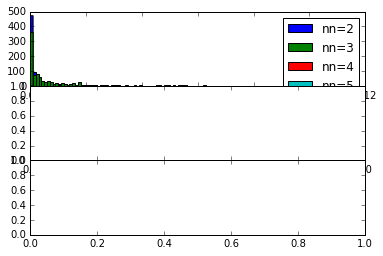

In [413]:
fig,ax=plt.subplots(1,3) #,figsize=(4,8),sharex=True)
plt.subplots_adjust(hspace=0)

# for cnt,key in zip(range(3),['v2_auto','v3_auto','v2v3_cross']):
cnt=0
key='v2_auto'
for nn in np.sort(d[key]['ref'].keys()):
    ax[cnt].hist(d[key]['dist'][nn]*3600,100,range=(0,0.1),label='nn='+nn,\
                normed=True)
ax[cnt].legend(loc='upper right')


#     hist[band],bins= np.histogram(chi[band][imag],\
#                             range=(low,hi),bins=50,normed=True)
#     db= (bins[1:]-bins[:-1])/2
#     binc[band]= bins[:-1]+db
#     ax[cnt].step(binc[band],hist[band], where='mid',c='b',lw=2) #label="%.1f < mag < %.1f" % (b_low,b_hi))


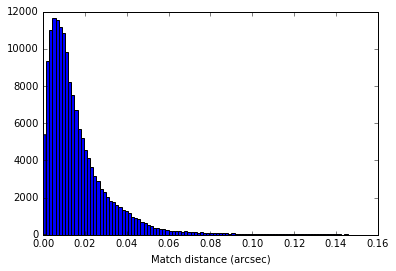

In [377]:
d.match_distance(d2d,range=(0,0.15),savefig=False)
k.

# Cosmos comparison

In [363]:
fits_funcs= cat.CatalogueFuncs()
c40=fits_funcs.stack('cosmos_40_tractor_list.txt')
c41=fits_funcs.stack('cosmos_41_tractor_list.txt')
mat=cat.Matcher()
cmatch,imiss,c_d2d= mat.match_within(c40,c41) #,dist=1./3600)
fits_funcs.set_extra_data(c40)
fits_funcs.set_extra_data(c41)

Matched: 87520/102554 objects


('Fit to Gaussian random draws:', (array([ 0.00891742,  1.00578756]), array([[  2.45959736e-05,  -7.81325000e-12],
       [ -7.81325000e-12,   1.63973034e-05]])))
band,w= r 2 40 41
 Cov[r-z,r-g]=[0.54,0.44]
[-0.08922685  1.42966662] $\sigma$=1.84 , 1.5
 Cov[r-z,r-g]=[-0.04,0.05]
[-0.07282076  0.99981886] $\sigma$=1.01 , 1.02
[-0.07282076  0.99981886] (-0.067757026787108418, 1.011918172091693) (-0.049335577, 1.017967337369919)
band,w= z 4 40 41
 Cov[z-r,z-g]=[0.54,0.37]
[ 0.00368858  1.44342443] $\sigma$=1.8 , 1.49
 Cov[z-r,z-g]=[-0.04,0.0]
[ 0.03681704  1.20343182] $\sigma$=1.24 , 1.21
[ 0.03681704  1.20343182] (0.0015381650357208785, 1.2444712383302234) (0.01935184, 1.2096207261085508)
band,w= g 1 40 41
 Cov[g-r,g-z]=[0.44,0.37]
[-0.04246938  1.16099443] $\sigma$=1.28 , 1.17
 Cov[g-r,g-z]=[0.05,0.0]
[-0.09388157  1.03306774] $\sigma$=1.06 , 1.04
[-0.09388157  1.03306774] (-0.026479746719942417, 1.063553463659239) (-0.043351516, 1.0403990864753725)


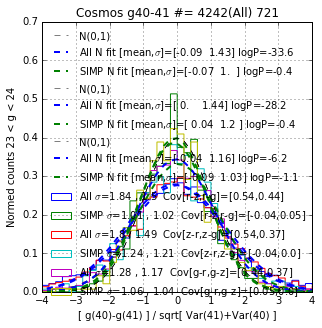

In [369]:
import plots
e=plots.EnriqueCosmos(c40,c41,cmatch,ref_name='40',obs_name='41',savefig=False)

In [367]:
import plots